In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
df=pd.read_csv("energy_consumption_dataset_950.csv")
df

,temperature,humidity,wind_speed,appliances,time_of_day,day_of_week,energy_consumption
0,24.363503,66.031012,8.313398,4,Night,Fri,25.365429
1,38.767858,69.902200,0.078444,1,Afternoon,Thu,37.330928
2,33.299849,40.522277,11.414861,2,Afternoon,Sat,29.352114
3,29.966462,84.864717,0.529670,1,Morning,Fri,34.962693
4,18.900466,55.126231,11.186007,4,Evening,Wed,22.837731
...,...,...,...,...,...,...,...
945,15.274896,73.984278,5.356817,6,Morning,Tue,20.466653
946,18.422141,66.959127,11.813236,7,Evening,Sat,23.335067
947,37.500466,41.281484,3.765021,5,Morning,Sat,36.134230
948,36.847252,51.323074,8.461110,3,Morning,Mon,37.149819


In [6]:
label=LabelEncoder()
for i in df.select_dtypes(include=["object"]).columns:
    df[i]=label.fit_transform(df[i]) 
df

,temperature,humidity,wind_speed,appliances,time_of_day,day_of_week,energy_consumption
0,24.363503,66.031012,8.313398,4,3,0,25.365429
1,38.767858,69.902200,0.078444,1,0,4,37.330928
2,33.299849,40.522277,11.414861,2,0,2,29.352114
3,29.966462,84.864717,0.529670,1,2,0,34.962693
4,18.900466,55.126231,11.186007,4,1,6,22.837731
...,...,...,...,...,...,...,...
945,15.274896,73.984278,5.356817,6,2,5,20.466653
946,18.422141,66.959127,11.813236,7,1,2,23.335067
947,37.500466,41.281484,3.765021,5,2,2,36.134230
948,36.847252,51.323074,8.461110,3,2,1,37.149819


In [7]:
x=df.drop("energy_consumption",axis=1) #features
y=df["energy_consumption"] # target

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [9]:
model=DecisionTreeRegressor()
model.fit(x_train,y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [10]:
y_pred=model.predict(x_test)
y_pred

array([33.47204886, 21.45106065, 30.01333537, 30.51467726, 24.3929822 ,
       28.23770907, 28.33000119, 25.49678187, 29.38312943, 31.5277602 ,
       25.48358807, 25.69056666, 24.30859435, 37.33843832, 28.30888451,
       33.47204886, 38.47698904, 23.90906731, 34.03182813, 35.39913197,
       39.23594159, 33.34161202, 29.44793462, 29.44793462, 27.8099155 ,
       21.65792864, 34.47394366, 25.31146263, 35.05380375, 32.71503711,
       20.34800994, 33.63454151, 34.37369926, 28.47738219, 37.10258466,
       24.40873254, 21.65792864, 36.02521778, 22.17807081, 37.10258466,
       32.22712321, 34.78705712, 32.02461729, 24.64627633, 35.986265  ,
       19.24320567, 25.66819596, 23.54086247, 36.04059509, 35.39913197,
       21.88414982, 29.7932324 , 39.23594159, 36.20123831, 22.95310641,
       28.33000119, 25.27292427, 23.09536369, 25.72155225, 24.14422827,
       31.80490063, 37.35352775, 27.72901739, 25.7235098 , 39.23594159,
       25.69056666, 31.50525569, 34.7430739 , 24.50602853, 29.07

In [11]:
mse=mean_squared_error(y_test,y_pred)
print(f'mean Squared Error:{mse}')
rmse=np.sqrt(mse)
print(f'Root Mean Squared Error:{rmse}')

mean Squared Error:7.739831038768946
Root Mean Squared Error:2.7820551825528095


In [12]:
score=r2_score(y_test,y_pred)
score

0.8098799247618023

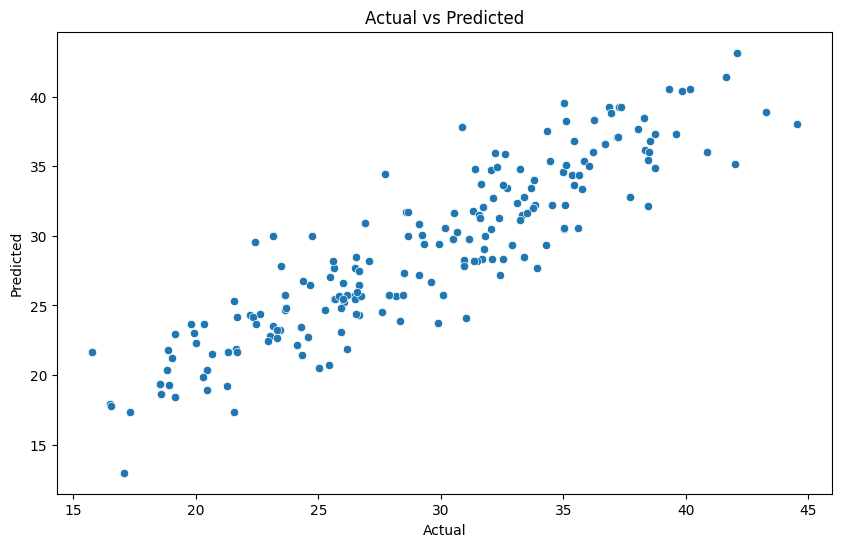

In [13]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test,y=y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()

In [14]:
new_data=pd.DataFrame({
    "temperature": 30.966462,
    "humidity": 56.959127,
    "wind_speed": 6.356817,
    "appliances": 5,
    "time_of_day":label.fit_transform(["Evening"]),
    "day_of_week":label.fit_transform(["Mon"]),
})

predit=model.predict(new_data)
predit

array([34.7430739])